In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# Load the diabetes data
df = pd.read_csv('/content/diabetes.csv')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [9]:
df.isnull()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
763,False,False,False,False,False,False,False,False,False
764,False,False,False,False,False,False,False,False,False
765,False,False,False,False,False,False,False,False,False
766,False,False,False,False,False,False,False,False,False


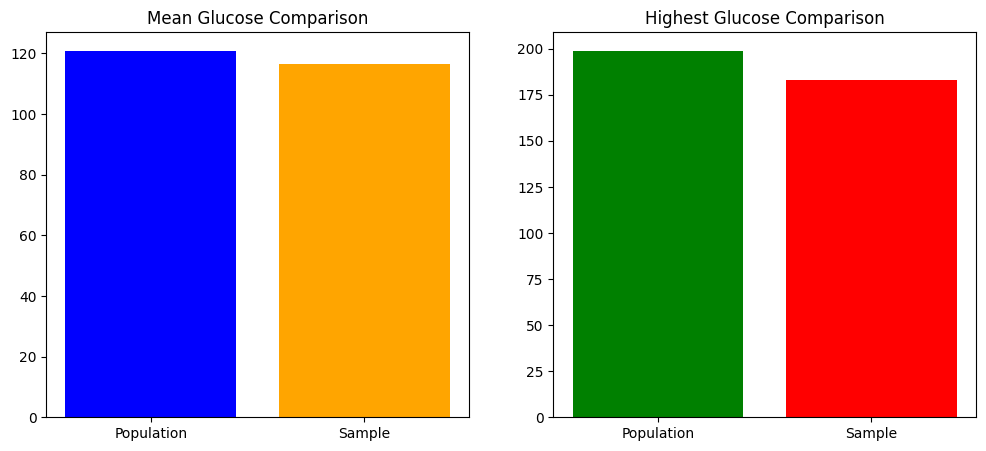

In [12]:
# Ensuring reproducibility by setting a random seed
np.random.seed(42)

# Selecting a random sample of 25 observations
sample_size = 25
sample = df.sample(n=sample_size)

# Computing the mean and maximum glucose values for both the entire population and the sample
population_mean_glucose = df['Glucose'].mean()
population_max_glucose = df['Glucose'].max()

sample_mean_glucose = sample['Glucose'].mean()
sample_max_glucose = sample['Glucose'].max()

# Visualization
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Comparing the Mean Glucose between the Population and the Sample
ax1.bar(['Population', 'Sample'], [population_mean_glucose, sample_mean_glucose], color=['blue', 'orange'])
ax1.set_title('Mean Glucose Comparison')

# Comparing the Maximum Glucose between the Population and the Sample
ax2.bar(['Population', 'Sample'], [population_max_glucose, sample_max_glucose], color=['green', 'red'])
ax2.set_title('Highest Glucose Comparison')

# Displaying the charts
plt.show()



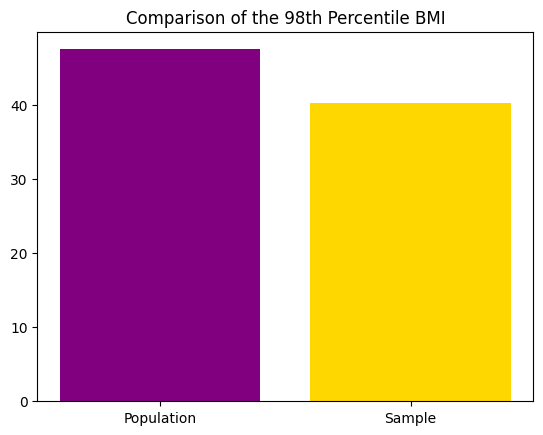

In [14]:
# Computing the 98th percentile of BMI for both the entire population and the sample data
population_percentile_bmi = np.percentile(df['BMI'], 98)
sample_percentile_bmi = np.percentile(sample['BMI'], 98)

# Visualization
fig, ax = plt.subplots()

# Creating a comparison chart of the 98th percentile BMI between the Population and the Sample
ax.bar(['Population', 'Sample'], [population_percentile_bmi, sample_percentile_bmi], color=['purple', 'gold'])
ax.set_title('Comparison of the 98th Percentile BMI')

# Displaying the chart
plt.show()



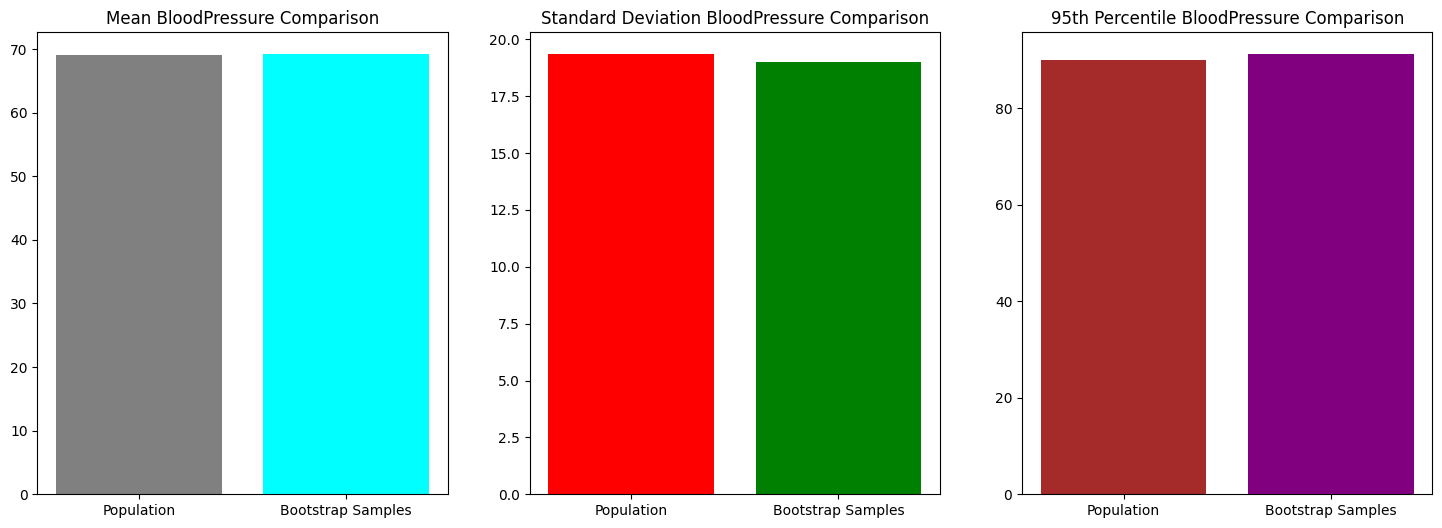

In [15]:
# Function to compute statistics for a given variable
def calculate_statistics(data):
    mean_value = np.mean(data)
    std_deviation = np.std(data)
    percentile_95 = np.percentile(data, 95)  # Using the 95th percentile for illustrative purposes
    return mean_value, std_deviation, percentile_95

# Bootstrap resampling
num_samples = 500
sample_size = 150
bootstrap_means = []
bootstrap_std_devs = []
bootstrap_percentiles = []

for _ in range(num_samples):
    bootstrap_sample = df['BloodPressure'].sample(n=sample_size, replace=True)
    mean_value, std_deviation, percentile_95 = calculate_statistics(bootstrap_sample)
    bootstrap_means.append(mean_value)
    bootstrap_std_devs.append(std_deviation)
    bootstrap_percentiles.append(percentile_95)

# Compute statistics for the entire population
population_mean, population_std_dev, population_percentile = calculate_statistics(df['BloodPressure'])

# Plotting bar graphs
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Comparison of Mean BloodPressure between Population and Bootstrap Samples
axes[0].bar(['Population', 'Bootstrap Samples'], [population_mean, np.mean(bootstrap_means)], color=['gray', 'cyan'])
axes[0].set_title('Mean BloodPressure Comparison')

# Comparison of Standard Deviation BloodPressure between Population and Bootstrap Samples
axes[1].bar(['Population', 'Bootstrap Samples'], [population_std_dev, np.mean(bootstrap_std_devs)], color=['red', 'green'])
axes[1].set_title('Standard Deviation BloodPressure Comparison')

# Comparison of 95th Percentile BloodPressure between Population and Bootstrap Samples
axes[2].bar(['Population', 'Bootstrap Samples'], [population_percentile, np.mean(bootstrap_percentiles)], color=['brown', 'purple'])
axes[2].set_title('95th Percentile BloodPressure Comparison')

# Displaying the charts
plt.show()
